# 3.1. Геометрические характеристики бинарных изображений

###  Вычислить площадь s, периметр р, ширину w, высоту h, отношение ширины к высоте w/h, отношение площади изображения к площади описывающего прямоугольника s/(wh), эквивалентный диаметр, центр масс, моменты бинарного изображения.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('Imgs/Barsuki.jpg',0)
img_cntrs = cv2.imread('Imgs/Barsuki.jpg',1)
imag = cv2.imread('Imgs/Barsuki.jpg',0)

Получим контур и топологическую структуру изображения:
Контур (первое возвращаемое значение) – это список, в котором хранятся все контуры изображения. Каждый контур представляет собой массив numpy, содержащий координаты точек границы объекта (x, y)
Топологической структурой (иерархия) – называется связь одного контура с другим, при помощи иерархии можно определить является ли контур дочерним или родительским по отношению к другому, если это необходимо


In [3]:
ret,thresh = cv2.threshold(img,0,255,0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)

Отобразим контур

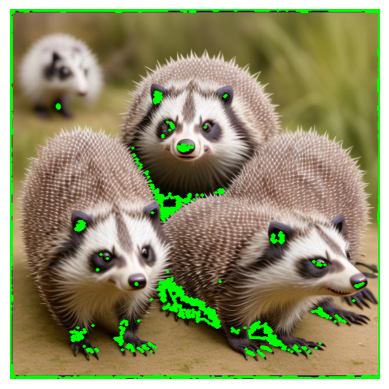

In [4]:
cv2.drawContours(img_cntrs, contours, -1, (0,255,0), 3)
plt.imshow(img_cntrs[...,::-1])
plt.axis("off");

Выделим один внешний контур

In [5]:
cnt = contours[0]

Найдём площадь ограниченную контуром

In [6]:
ar = cv2.contourArea(cnt)
print(ar)

406790.5


Теперь получим длину контурного периметра

In [7]:
prm = cv2.arcLength(cnt,True)
print(prm)

3190.0351935625076


Моменты представляют собой среднее значение интенсивности пикселей изображения.
Найдём их:

In [8]:
M = cv2.moments(cnt)
print(M)

{'m00': 406790.5, 'm10': 130134893.83333333, 'm01': 129742405.83333333, 'm20': 55444040529.08333, 'm11': 41491648595.041664, 'm02': 55153929732.08333, 'm30': 26572187022724.953, 'm21': 17682773729435.582, 'm12': 17638643123995.35, 'm03': 26373657332500.75, 'mu20': 13813052113.63868, 'mu11': -13780388.18699646, 'mu02': 13773681492.703682, 'mu30': -2485858250.953125, 'mu21': 8180569918.052734, 'mu12': 3337017430.9316406, 'mu03': -3223845142.2148438, 'nu20': 0.08347338901786397, 'nu11': -8.327599827228321e-05, 'nu02': 0.08323546917725633, 'nu30': -2.3553169390311232e-05, 'nu21': 7.750978919063627e-05, 'nu12': 3.161778704759953e-05, 'nu03': -3.05454949788889e-05}


Получим высоту и ширину

In [9]:
x,y,w,h = cv2.boundingRect(cnt)
print(x,y,w,h)

0 0 640 640


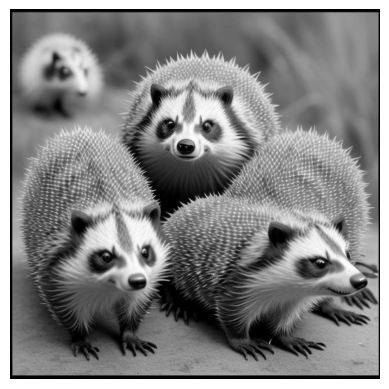

In [10]:
imag = cv2.rectangle(imag,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(imag, 'gray')
plt.axis('off');

Найдём отношение ширины к высоте

In [11]:
asprat = float(w) / h
print(asprat)

1.0


Найдём отношение площади контура к площади ограничивающего прямоугольника

In [12]:
rectar = w * h
extent = float(ar)/rectar
print(extent)

0.993140869140625


Найдём эквивалентный диаметр:

In [13]:
eqdiam = np.sqrt(4*ar/np.pi)
print(eqdiam)

719.6817011864267


# Задание 3.2 Характерные параметры бинарных изображений

### Используя изображение маски определить крайние точки, минимальное и максимальное значения и их координаты для бинарного изображения. Найти среднюю интенсивность изображения в градациях серого, ориентацию бинарного изображения с выделенной осью.

In [14]:
img = cv2. imread('Imgs/Barsuki.jpg',0)
ret,thresh = cv2.threshold(img,0,255,0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)
cnt = contours[0]

Получим маску изображения

In [15]:
mask = np.zeros(img.shape, np.uint8)
cv2.drawContours(mask, [cnt], 0, 255, -1)
pixpoin = np.transpose(np.nonzero(mask))

Максимальное и минимальное значения и их координаты

In [16]:
minv, maxv, minl, maxl = cv2.minMaxLoc(img, mask=mask)

Найдём крайние точки изображения

In [17]:
leftmost = tuple(cnt[cnt[:, :, 0].argmin()][0])
rightmost = tuple(cnt[cnt[:, :, 0].argmax()][0])
topmost = tuple(cnt[cnt[:, :, 1].argmin()][0])
bottommost = tuple(cnt[cnt[:, :, 1].argmax()][0])

Средняя интенсивность

In [18]:
meanv = cv2.mean(img,mask = mask)

Ориентация – это угол, под которым направлено выделенное направление изображения. Найдём её

In [19]:
(x,y),(MA,ma),ang=cv2.fitEllipse(cnt)

In [20]:
print(pixpoin)
print(minv, maxv, minl, maxl)
print(leftmost, rightmost, topmost, bottommost)
print(meanv)
print(ang)

[[  0   0]
 [  0   1]
 [  0   2]
 ...
 [639 631]
 [639 632]
 [639 633]]
0.0 255.0 (48, 0) (340, 167)
(0, 0) (639, 0) (0, 0) (633, 639)
(118.61088892861778, 0.0, 0.0, 0.0)
179.25558471679688
